In [1]:
%matplotlib inline
import sys
import os
current_dir = os.path.dirname(os.path.realpath('__file__'))

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)
import pickle
from sdypy import EMA
import numpy as np
import matplotlib.pyplot as plt 
from EMA_functions import *
import pandas as pd
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors as col
from pyidi.selection import ROISelect
# importlib.reload(EMA_functions)
# from EMA_functions import animate_mode_shape

c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\napari\utils\misc.py:428: DeprecationWarning: `CallDefault` in napari v0.5.0 and will be removed in v0.6.0.
  warnings.warn(
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



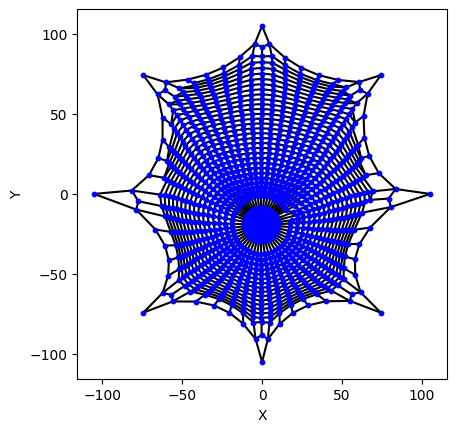

In [2]:
import sys
import json
current_dir = os.path.dirname(os.path.realpath('__file__'))
parent_dir = os.path.dirname(os.path.dirname(current_dir))

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)
from printing_tensioned_structures.src.network import *
# Now you can import your module

file_name_vec = ['Web_constant_length_ecc0_gap0_constraint', 'Web_constant_length_ecc1_gap0_constraint', 'Web_constant_length_ecc2_gap0_constraint']
json_root = r'D:\thijsmas'
file_path = os.path.join(json_root, file_name_vec[2] + '.json')
with open(file_path) as f:
    data = json.load(f)

vertices = []
int_keys = [int(key) for key in data['vertices'].keys()]
for key in sorted(int_keys):

    vertices.append([data['vertices'][str(key)]['x'], data['vertices'][str(key)]['y'], data['vertices'][str(key)]['z']])
vertices = np.array(vertices)

edges = []
edge_keys = [int(key) for key in data['edges'].keys()]
for key in sorted(edge_keys):
    edges.append(data['edges'][str(key)])

# q = []
# for key in sorted(data['q'].keys()):
    # q.append(data['q'][key])
# q = np.array(q)

fixed = data['fixed']

# net = Network_custom.from_fd(vertices, edges, q, fixed, paths = None, dir = None)
net = Network_custom()
net.vertices = vertices
net.edges = np.array(edges)
# net.q = q
net.fixed = data['fixed']

net.net_plot(color=False, elables = False, vlabels = False, plot_type='equilibrium')

fig, ax = plt.subplots()
fig, ax = net.net_plot_2D(fig, ax)
plt.show()

In [3]:
# root_disp = os.path.normpath(r'G:/.shortcut-targets-by-id/1k1B8zPb3T8H7y6x0irFZnzzmfQPHMRPx/Illimited Lab Projects/Spiders/Simulations')
df = pd.read_csv('I:/My Drive/PHD/HSC/file_descriptions_wlocs.csv')
# file_name = "Full_web_ecc0_new_Floc4_v1" # First attempt
# file_name_vec = ['Full_web_ecc0_new_Floc9_v0', 
#                  'Full_web_ecc0_new_Floc9_v1', 
#                  'Full_web_ecc1_new_Floc1_v4',
#                  'Full_web_ecc1_new_Floc1_v5',
#                  'Full_web_ecc2_new_Floc7_v0',
#                  'Full_web_ecc2_new_Floc7_v1']
# file_name = file_name_vec[5]
file_name = 'Full_web_ecc2_new_Floc7_v0'

EMA_structure = EMA_Structure.load(file_name)
video  = EMA_structure.open_video()


D:/thijsmas/HSC\ecc2\web0\rev1\Full_web_ecc2_new_Floc7_v0_S01\Full_web_ecc2_new_Floc7_v0_S01.cihx


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:104: UserWarning:

Clipped footage! (Total frame: 7000, Original total frame: 87371)



In [87]:
height_pixels = 70
width_elipse = 130
EMA_structure.spider_ij = (534, 279)
inside_and_valid, angle_sections, bucket_edges = section_classifier(EMA_structure, n_sections = 8, width_elipse = width_elipse, height_elipse = height_pixels)
d_hub = EMA_structure.d[inside_and_valid]
EMA_structure.spider_ij

(534, 279)

In [4]:
select_points = ROISelect(video)
points = np.flip(np.array(select_points.polygon, dtype=np.float32).T[:-1], axis=1)
points

array([], shape=(0, 2), dtype=float32)

In [5]:
points = np.array([[ 880.,  422.],
       [ 494.,  483.],
       [ 118.,  405.],
       [ -11.,  226.],
       [ 168.,   68.],
       [ 522.,   20.],
       [ 864.,   90.],
       [1031.,  253.],
       [ 507.,  222.]], dtype=np.float32)

In [18]:
%matplotlib qt
import cv2
image = video.reader.get_frame(0)
height, width = image.shape[:2]
scaler = 2.5
shift = [width/2, -height/2]

# Fixed points and center point from mesh
# points_distorted   = np.vstack((points, np.array(EMA_structure.spider_ij).T))
# selection = [0, 1, 2, 4, 5, 7, 8]
points_distorted = points
points_undistorted = np.array([scaler*vertices[fixed + [data['gkey_center_n']["'node_number'"]]][:, 0] + shift[0], -scaler*vertices[fixed + [data['gkey_center_n']["'node_number'"]]][:, 1] - shift[1]], dtype=np.float32).T

homography_matrix, _ = cv2.findHomography(points_distorted, points_undistorted, method=cv2.RANSAC)
# Apply the homography transformation to the entire image

undistorted_image = cv2.warpPerspective(image, homography_matrix, (width, height))

spider_new = np.dot(homography_matrix, np.array([EMA_structure.spider_ij[0], EMA_structure.spider_ij[1], 1]))
spider_new = spider_new[:2]/spider_new[2]

prey_new = np.dot(homography_matrix, np.array([EMA_structure.prey_ij[0], EMA_structure.prey_ij[1], 1]))
prey_new = prey_new[:2]/prey_new[2]

tp_new = np.dot(homography_matrix, np.array([EMA_structure.tp[:, 1], EMA_structure.tp[:, 0], np.ones(EMA_structure.tp.shape[0])]))
tp_new = (tp_new[1::-1]/tp_new[2][np.newaxis, :]).T

fig, ax = plt.subplots(2, 1)
ax[0].imshow(image, cmap='gray')
ax[0].plot(points_distorted[:,0], points_distorted[:,1], 'r*')
ax[0].plot(EMA_structure.spider_ij[0], EMA_structure.spider_ij[1], 'g*')
ax[0].plot(EMA_structure.prey_ij[0], EMA_structure.prey_ij[1], 'b*')
ax[0].plot(EMA_structure.tp[:, 1], EMA_structure.tp[:, 0], 'y*')

ax[1].imshow(undistorted_image, cmap='gray')
# fig, ax[1] = net.net_plot_2D(fig, ax[1], scaler = scaler, alpha=0.2, shift = shift)
ax[1].plot(points_undistorted[:, 0], points_undistorted[:, 1], 'r*', zorder = 100)
ax[1].plot(spider_new[0], spider_new[1], 'g*')
ax[1].plot(prey_new[0], prey_new[1], 'b*')
ax[1].plot(tp_new[:, 1], tp_new[:, 0], 'y*')

EMA_structure.tp.shape, tp_new.shape

((2034, 2), (2034, 2))

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
frame = video.reader.get_frame(0)
height, width = frame.shape
scaler = 2.2
ax.imshow(frame, cmap='gray')


In [ ]:
%matplotlib qt

cmap_circ = cm.get_cmap('Accent')
norm = col.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(norm = norm, cmap=cmap_circ)
n_sections = 8
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
ax.set_xlim(EMA_structure.spider_ij[0]-width_elipse*.6, EMA_structure.spider_ij[0]+width_elipse*.6)
ax.set_ylim(EMA_structure.spider_ij[1]+height_pixels*.6, EMA_structure.spider_ij[1]-height_pixels*.6)
ax.plot([EMA_structure.spider_ij[0],EMA_structure.prey_ij[0]], [EMA_structure.spider_ij[1],EMA_structure.prey_ij[1]], 'k--')
for section in range(n_sections):
    current_points = angle_sections == section
    ax.scatter(EMA_structure.tp[inside_and_valid,1][current_points], EMA_structure.tp[inside_and_valid,0][current_points], s = 5, c = sm.to_rgba(section/(n_sections-1)))

In [9]:
%matplotlib qt
dt = 1/EMA_structure.fs_camera
fig, ax = plt.subplots()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (pixels)')
d_save = np.zeros((n_sections, len(d_hub[0]), 2))
for section in range(n_sections):
    current_points = angle_sections == section
    d = np.average(d_hub[current_points], axis = 0)
    d_save[section] = d
    ax.plot(np.arange(0,len(d))*dt, d[:,0], c = sm.to_rgba(section/(n_sections-1)), label = 'Section {}'.format(section))

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('Time (s)')
ax.set_ylabel('rotation (-)')
d_rot = np.zeros((n_sections//2, len(d_hub[0]), 2))
for section in range(n_sections//2):
    d_rot[section] = d_save[section] - d_save[section+4]
    ax.plot(np.arange(0,len(d))*dt, d_rot[section][:,0], c = sm.to_rgba(section/(n_sections/2-1)), label = 'Section {}'.format(section))


In [12]:
EMA_structure.disp_fft = EMA_structure._FFT_on_signal(d_rot, EMA_structure.n_d)
n_freq = len(EMA_structure.freq_camera)
EMA_structure.disp_fft[1:] *= 2
EMA_structure.disp_fft = EMA_structure.disp_fft[:,:n_freq]

In [ ]:
EMA_structure.disp_fft_y = EMA_structure.disp_fft
EMA_structure.get_transfer_function()

In [ ]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(15, 5))
ax.semilogy(EMA_structure.freq_force, np.abs(EMA_structure.force_fft), label='Force')
for section in range(n_sections//2):
    ax.semilogy(EMA_structure.freq_camera, np.abs(EMA_structure.disp_fft[section]), label='Displacement')
ax.set_xlim(0, 50)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Force [N], Displacment [m] amplitude spectra')
# plt.legend()

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15, 9))
ax[0].plot(EMA_structure.freq_camera, np.abs(EMA_structure.H1[EMA_structure.valid_tps][0]), 'k', linewidth=0.1, alpha=0.1, label='|H1i|')
ax[0].plot(EMA_structure.freq_camera, np.mean(np.abs(EMA_structure.H1[EMA_structure.valid_tps]), axis=0),'g', label='|H1| mean')
ax[1].semilogy(EMA_structure.freq_camera, np.mean(np.abs(EMA_structure.H1[EMA_structure.valid_tps]), axis=0),'g', label='|H1| mean')
for tp_id in range(1, len(EMA_structure.tp[EMA_structure.valid_tps]),15):
    ax[0].plot(EMA_structure.freq_camera, np.abs(EMA_structure.H1[EMA_structure.valid_tps][tp_id]), 'k', linewidth=0.1, alpha=0.1)
    ax[1].semilogy(EMA_structure.freq_camera, np.abs(EMA_structure.H1[EMA_structure.valid_tps][tp_id]), 'k', linewidth=0.1, alpha=0.1)
ax[0].set_ylabel('|H|')
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
# ax[0].set_ylim(0, 6000)
ax[0].legend()
# set the x-ticks
xticks = np.linspace(0, 100, 21)
ax[0].set_xticks(xticks)
ax[0].grid(axis='x', which='both')
# show the plot
plt.show()


In [ ]:
EMA_structure.save()

In [ ]:
cam = EMA.Model(EMA_structure.H1[EMA_structure.valid_tps], EMA_structure.freq_camera, lower=5, upper=100, pol_order_high=80, frf_type = 'accelerance')
cam.get_poles(show_progress=True)
# cam.Select_poles.chart_type = 1
cam.select_poles()

In [ ]:
cam.F_peak = EMA_structure.F_peak
cam.peak_n = peak_n
with open(os.path.join(EMA_structure.root_cam, f'{EMA_structure.file_name}_cam.pkl'), 'wb') as f:
    pickle.dump(cam, f)
cam.print_modal_data()
cam.F_peak, file_name

In [ ]:
fig, ax = plot_FRF(cam)
fig.savefig(os.path.join(EMA_structure.root_simulations, 'FRFs', f'FRF_{EMA_structure.file_name}_v0.png'))
fig = plot_MAC(cam)
fig.savefig(os.path.join(EMA_structure.root_simulations, 'MAC', f'MAC_{EMA_structure.file_name}_v0.png'))
# fig, ax, GREEN = find_green(cam, plot = True)

In [ ]:
idx = np.where(EMA_structure.tp[EMA_structure.valid_tps] == EMA_structure.nearest_nut_index)[0]
root_mode_shapes = os.path.join(EMA_structure.root_simulations, 'web mode shapes', EMA_structure.file_name)
for mode in range(len(cam.nat_freq)):
    fig, ax = plot_mode_shape(cam, mode,  EMA_structure.tp[EMA_structure.valid_tps], idx, view = (26, -72) )
    fig.savefig(os.path.join(root_mode_shapes, f'Mode_shape_{EMA_structure.file_name}_{mode}.png'), dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
%matplotlib qt

if not os.path.exists(root_mode_shapes):
    os.makedirs(root_mode_shapes)

for mode_number in range(len(cam.nat_freq)): # range(14,n_modes): #  [22]: # 
    print(f'mode_number: {mode_number}')
    ani  = animate_mode_shape(cam, mode_number, EMA_structure.tp[EMA_structure.valid_tps]) #, indices_to_plot = indices_to_plot np.delete(tp_lim, biggest_outliers, axis=0)
    writer = animation.FFMpegWriter(fps=60)
    ani.save(os.path.join(root_mode_shapes, f'Mode_shape_{EMA_structure.file_name}_{mode_number}.mp4'), writer=writer)
    plt.close()
